<a href="https://colab.research.google.com/github/parkyw2/parkyw2/blob/main/%EA%B8%B0%EC%9E%AC%ED%92%88_%EC%86%8C%EB%AA%A8%ED%92%88%EB%B9%84_%EA%B3%B5%EC%9E%A5%EB%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext rpy2.ipython
%matplotlib inline
from fbprophet import Prophet
import pandas as pd
from matplotlib import pyplot as plt
import logging
logging.getLogger('prophet').setLevel(logging.ERROR)
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd drive/My\ Drive/회사 데이터

/content/drive/My Drive/회사 데이터


In [4]:
df = pd.read_csv('소모품비_기재품_plant.csv')

In [5]:
df.tail(10)

,date,1110,1120,1130,1140,1150,1160,1170,1180,total
1086,2021-12-22,4193400,1400600,0,2224040,12058740,1691700,466210,1445400,23480090
1087,2021-12-23,10788600,1317958,0,1878800,462870,0,1211400,78000,15737628
1088,2021-12-24,0,136300,0,567400,0,2484400,557320,0,3745420
1089,2021-12-25,0,0,0,0,0,0,0,0,0
1090,2021-12-26,0,0,0,0,0,0,0,0,0
1091,2021-12-27,10026356,3562000,0,2223180,0,4850900,3431300,2737980,26831716
1092,2021-12-28,3716000,0,0,0,0,5757400,1325800,774900,11574100
1093,2021-12-29,145800,0,0,387100,0,6234849,336700,583300,7687749
1094,2021-12-30,388360,835300,0,3468040,10233600,9261860,570800,0,24757960
1095,2021-12-31,0,651600,0,183400,-205956,3487730,491100,0,4607874


In [6]:
#안양
df_1110 = df[['date','1110']]

In [7]:
df_1110.tail(10)

,date,1110
1086,2021-12-22,4193400
1087,2021-12-23,10788600
1088,2021-12-24,0
1089,2021-12-25,0
1090,2021-12-26,0
1091,2021-12-27,10026356
1092,2021-12-28,3716000
1093,2021-12-29,145800
1094,2021-12-30,388360
1095,2021-12-31,0


In [8]:
df_1110['ds'] = pd.to_datetime(df['date'])
df_1110['y'] = df_1110['1110']
df_1110 = df_1110.loc[:,['ds', 'y']]
df_1110.head()

,ds,y
0,2019-01-01,0
1,2019-01-02,3109480
2,2019-01-03,626700
3,2019-01-04,6283080
4,2019-01-05,0


In [9]:
df_1110['ds'] = pd.to_datetime(df_1110['ds'])
df_1110 = df_1110[df_1110['ds'].dt.dayofweek < 5]
df_1110['date_index'] = df_1110['ds']
df_1110 = df_1110.set_index('date_index')
df_1110['cap'] = 30000000
df_1110['floor'] = 0
df_1110.head(10)

,ds,y,cap,floor
date_index,,,,
2019-01-01,2019-01-01,0,30000000,0
2019-01-02,2019-01-02,3109480,30000000,0
2019-01-03,2019-01-03,626700,30000000,0
2019-01-04,2019-01-04,6283080,30000000,0
2019-01-07,2019-01-07,48469320,30000000,0
2019-01-08,2019-01-08,4636370,30000000,0
2019-01-09,2019-01-09,627590,30000000,0
2019-01-10,2019-01-10,4796580,30000000,0
2019-01-11,2019-01-11,0,30000000,0


In [10]:
df_1110.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 784 entries, 2019-01-01 to 2021-12-31
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      784 non-null    datetime64[ns]
 1   y       784 non-null    int64         
 2   cap     784 non-null    int64         
 3   floor   784 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 30.6 KB


In [11]:
from datetime import datetime
df_1110 = df_1110[datetime(2019, 1, 1):datetime(2021, 12, 22)]

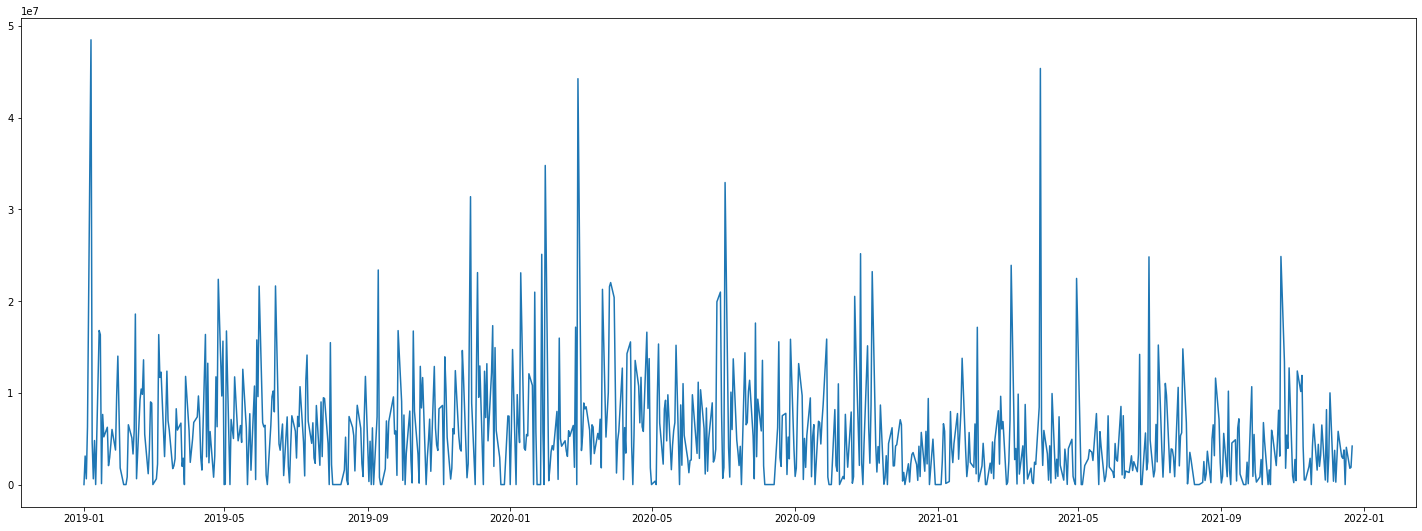

In [12]:
plt.figure(figsize = (25, 9))
plt.plot(df_1110.index,df_1110.y)
plt.show()

In [13]:
m=Prophet(growth='logistic',weekly_seasonality= 20,yearly_seasonality=5,seasonality_prior_scale=20, changepoint_prior_scale=0.5)
m.add_seasonality(name='monthly', period=30.5, fourier_order=2)
m.add_country_holidays(country_name='KR')
m.fit(df_1110)

future = m.make_future_dataframe(periods=9)
future = future[future['ds'].dt.dayofweek < 5]
future['cap'] = 30000000
future['floor'] = 0

future.tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,cap,floor
781,2021-12-27,30000000,0
782,2021-12-28,30000000,0
783,2021-12-29,30000000,0
784,2021-12-30,30000000,0
785,2021-12-31,30000000,0


In [14]:
forecast=m.predict(future)
preds= forecast['yhat'][:-7]

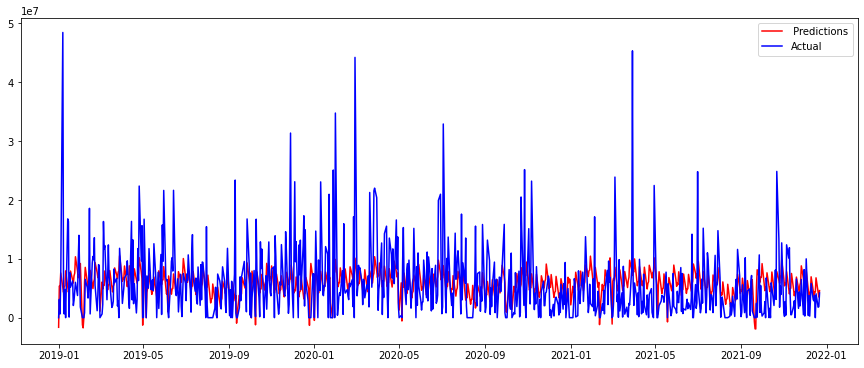

In [15]:
plt.figure(figsize=(15,6))
plt.plot(df_1110.index,preds,color='red',label=' Predictions')
plt.plot(df_1110.index,df_1110.y,color='blue',label='Actual')
plt.legend()
plt.show()

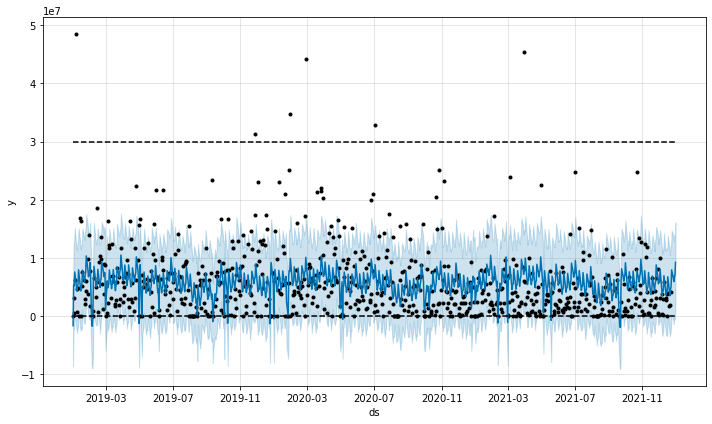

In [16]:
fig = m.plot(m.predict(future))

In [17]:
r2 = round(r2_score(df_1110["y"], preds), 3)
mse = round(mean_squared_error(df_1110["y"], preds), 3)
mae = round(mean_absolute_error(df_1110["y"], preds), 3)
print("R2: ", r2)
print("MSE: ", mse)
print("MAE: ", mae)

R2:  0.111
MSE:  31318539590336.895
MAE:  3929033.653


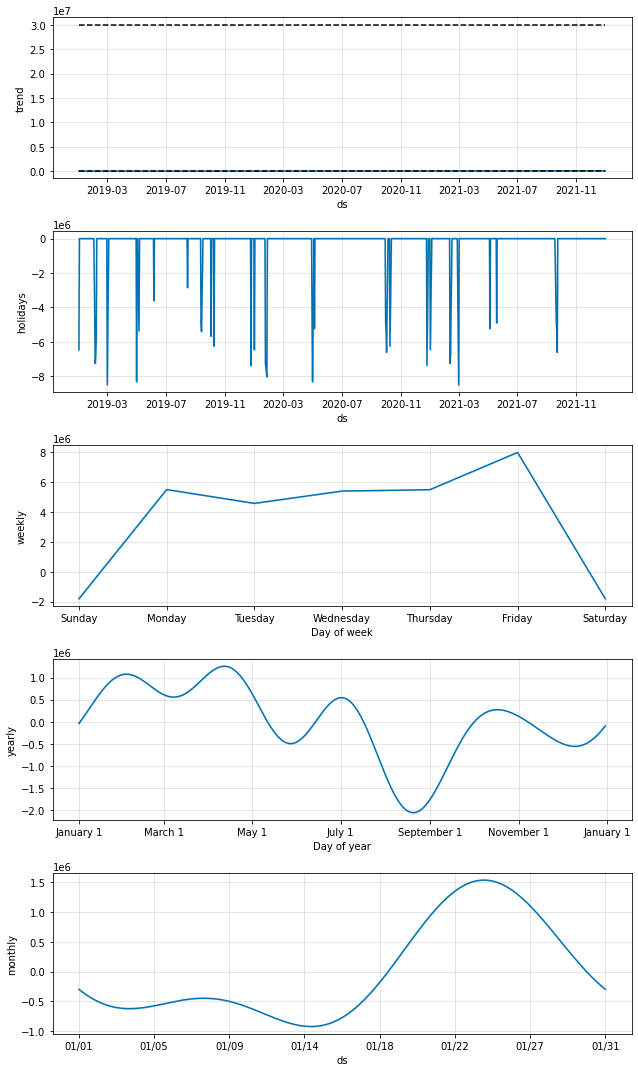

In [18]:
fig = m.plot_components(forecast)

In [19]:
forecast.tail()

,ds,trend,cap,floor,yhat_lower,yhat_upper,trend_lower,trend_upper,Alternative holiday of Children's Day,Alternative holiday of Children's Day_lower,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
779,2021-12-27,72284.246015,30000000,0,-2.528047e+05,1.332184e+07,72284.246015,72284.246015,0.0,0.0,...,5.510173e+06,5.510173e+06,5.510173e+06,-248798.295335,-248798.295335,-248798.295335,0.0,0.0,0.0,6.618270e+06
780,2021-12-28,72494.751360,30000000,0,-1.174237e+06,1.329347e+07,72494.751360,72494.751360,0.0,0.0,...,4.584945e+06,4.584945e+06,4.584945e+06,-212056.692876,-212056.692876,-212056.692876,0.0,0.0,0.0,5.919176e+06
781,2021-12-29,72705.868247,30000000,0,8.167761e+04,1.379009e+07,72705.868247,72705.868247,0.0,0.0,...,5.409090e+06,5.409090e+06,5.409090e+06,-173587.312730,-173587.312730,-173587.312730,0.0,0.0,0.0,6.844492e+06
782,2021-12-30,72917.598444,30000000,0,4.341223e+05,1.420865e+07,72917.598444,72917.598444,0.0,0.0,...,5.500634e+06,5.500634e+06,5.500634e+06,-133497.685225,-133497.685225,-133497.685225,0.0,0.0,0.0,6.907127e+06
783,2021-12-31,73129.943724,30000000,0,1.765396e+06,1.628922e+07,73129.943724,73129.943724,0.0,0.0,...,7.998790e+06,7.998790e+06,7.998790e+06,-91905.464580,-91905.464580,-91905.464580,0.0,0.0,0.0,9.257905e+06


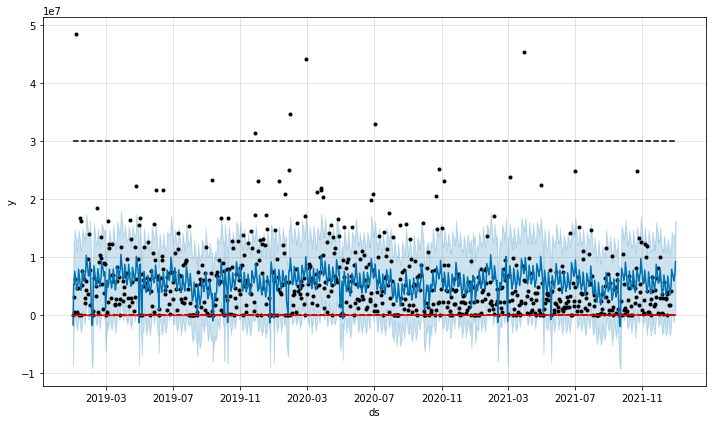

In [20]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [21]:
  pd.options.display.float_format = '{:,.0f}'.format

In [22]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(9))

            ds      yhat  yhat_lower  yhat_upper
775 2021-12-21 3,504,251  -3,524,538  10,540,548
776 2021-12-22 4,597,513  -2,717,560  11,745,425
777 2021-12-23 5,043,077  -2,085,052  12,144,318
778 2021-12-24 7,951,139     163,040  14,402,951
779 2021-12-27 6,618,270    -252,805  13,321,844
780 2021-12-28 5,919,176  -1,174,237  13,293,469
781 2021-12-29 6,844,492      81,678  13,790,085
782 2021-12-30 6,907,127     434,122  14,208,652
783 2021-12-31 9,257,905   1,765,396  16,289,222


In [23]:
final_1110 = forecast[['ds', 'yhat']]
final_1110['yhat_1110'] = final_1110['yhat']
final_1110 = final_1110[['ds', 'yhat_1110']]

In [24]:
final_1110.tail()

,ds,yhat_1110
779,2021-12-27,"6,618,270"
780,2021-12-28,"5,919,176"
781,2021-12-29,"6,844,492"
782,2021-12-30,"6,907,127"
783,2021-12-31,"9,257,905"


In [25]:
#Ansung
df_1120 = df[['date','1120']]
df_1120['ds'] = pd.to_datetime(df_1120['date'])
df_1120['y'] = df_1120['1120']
df_1120 = df_1120.loc[:,['ds', 'y']]
df_1120.head()

,ds,y
0,2019-01-01,0
1,2019-01-02,459470
2,2019-01-03,921500
3,2019-01-04,256950
4,2019-01-05,0


In [26]:
df_1120['ds'] = pd.to_datetime(df_1120['ds'])
df_1120 = df_1120[df_1120['ds'].dt.dayofweek < 5]
df_1120['date_index'] = df_1120['ds']
df_1120 = df_1120.set_index('date_index')
df_1120['cap'] = 30000000
df_1120['floor'] = 0
df_1120.head(10)

,ds,y,cap,floor
date_index,,,,
2019-01-01,2019-01-01,0,30000000,0
2019-01-02,2019-01-02,459470,30000000,0
2019-01-03,2019-01-03,921500,30000000,0
2019-01-04,2019-01-04,256950,30000000,0
2019-01-07,2019-01-07,0,30000000,0
2019-01-08,2019-01-08,59080,30000000,0
2019-01-09,2019-01-09,247650,30000000,0
2019-01-10,2019-01-10,196300,30000000,0
2019-01-11,2019-01-11,1889730,30000000,0


In [27]:
from datetime import datetime
df_1120 = df_1120[datetime(2019, 1, 1):datetime(2021, 12, 22)]

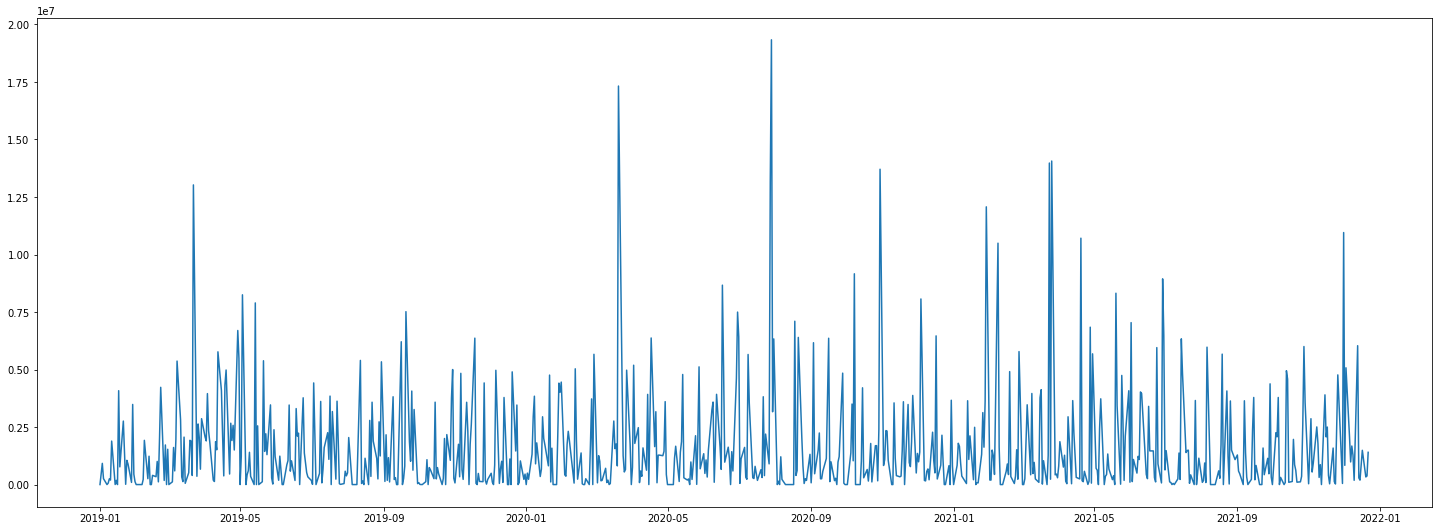

In [28]:
plt.figure(figsize = (25, 9))
plt.plot(df_1120.index,df_1120.y)
plt.show()

In [29]:
m=Prophet(growth='logistic',weekly_seasonality= 20,yearly_seasonality=5,seasonality_prior_scale=20, changepoint_prior_scale=0.5)
m.add_seasonality(name='monthly', period=30.5, fourier_order=2)
m.add_country_holidays(country_name='KR')
m.fit(df_1120)

future = m.make_future_dataframe(periods=9)
future = future[future['ds'].dt.dayofweek < 5]
future['cap'] = 20000000
future['floor'] = 0

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [30]:
forecast=m.predict(future)
forecast.tail(10)

,ds,trend,cap,floor,yhat_lower,yhat_upper,trend_lower,trend_upper,Alternative holiday of Children's Day,Alternative holiday of Children's Day_lower,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
774,2021-12-20,"309,223",20000000,0,"-1,893,481","3,801,115","309,223","309,223",0,0,...,"1,017,405","1,017,405","1,017,405","-342,652","-342,652","-342,652",0,0,0,"995,930"
775,2021-12-21,"309,746",20000000,0,"-1,462,838","4,112,606","309,746","309,746",0,0,...,"1,410,972","1,410,972","1,410,972","-343,739","-343,739","-343,739",0,0,0,"1,358,194"
776,2021-12-22,"310,270",20000000,0,"-1,519,940","4,260,830","310,270","310,270",0,0,...,"1,561,105","1,561,105","1,561,105","-343,807","-343,807","-343,807",0,0,0,"1,501,385"
777,2021-12-23,"310,795",20000000,0,"-1,476,468","4,068,933","310,795","310,795",0,0,...,"1,389,600","1,389,600","1,389,600","-342,869","-342,869","-342,869",0,0,0,"1,356,941"
778,2021-12-24,"311,320",20000000,0,"-578,412","4,880,245","311,320","311,320",0,0,...,"1,947,703","1,947,703","1,947,703","-340,945","-340,945","-340,945",0,0,0,"1,979,013"
779,2021-12-27,"312,903",20000000,0,"-1,555,778","4,171,729","312,903","312,903",0,0,...,"1,017,405","1,017,405","1,017,405","-329,562","-329,562","-329,562",0,0,0,"1,382,512"
780,2021-12-28,"313,432",20000000,0,"-695,277","4,751,111","313,432","313,432",0,0,...,"1,410,972","1,410,972","1,410,972","-324,033","-324,033","-324,033",0,0,0,"1,881,162"
781,2021-12-29,"313,962",20000000,0,"-732,370","4,982,871","313,962","313,962",0,0,...,"1,561,105","1,561,105","1,561,105","-317,721","-317,721","-317,721",0,0,0,"2,102,170"
782,2021-12-30,"314,493",20000000,0,"-861,464","4,771,544","314,493","314,493",0,0,...,"1,389,600","1,389,600","1,389,600","-310,683","-310,683","-310,683",0,0,0,"1,952,633"
783,2021-12-31,"315,025",20000000,0,"-359,303","5,199,441","315,025","315,025",0,0,...,"1,947,703","1,947,703","1,947,703","-302,984","-302,984","-302,984",0,0,0,"2,475,644"


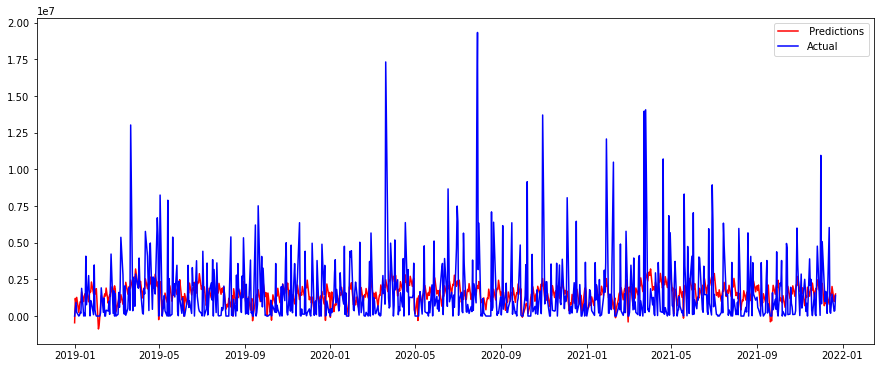

In [31]:
preds= forecast['yhat'][:-7]
plt.figure(figsize=(15,6))
plt.plot(df_1120.index,preds,color='red',label=' Predictions')
plt.plot(df_1120.index,df_1120.y,color='blue',label='Actual')
plt.legend()
plt.show()

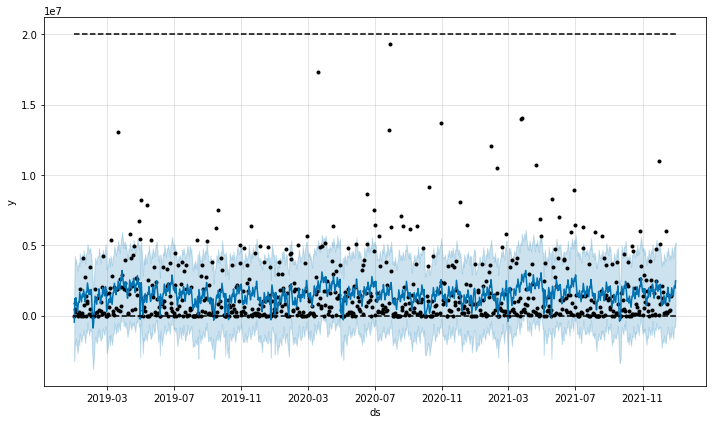

In [32]:
fig = m.plot(m.predict(future))

In [33]:
r2 = round(r2_score(df_1120["y"], preds), 3)
mse = round(mean_squared_error(df_1120["y"], preds), 3)
mae = round(mean_absolute_error(df_1120["y"], preds), 3)
print("R2: ", r2)
print("MSE: ", mse)
print("MAE: ", mae)

R2:  0.074
MSE:  4856493815468.635
MAE:  1459519.49


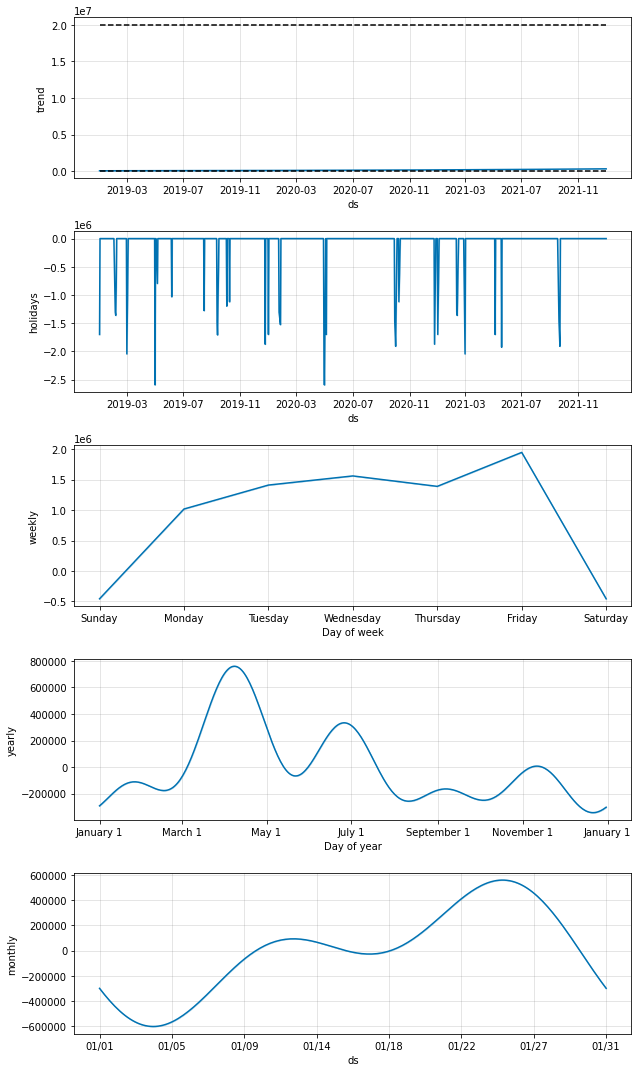

In [34]:
fig = m.plot_components(forecast)

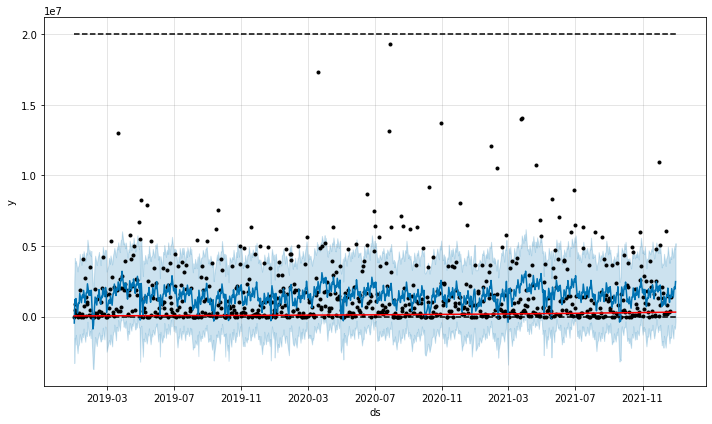

In [35]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [36]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(9))

            ds      yhat  yhat_lower  yhat_upper
775 2021-12-21 1,358,194  -1,462,838   4,112,606
776 2021-12-22 1,501,385  -1,519,940   4,260,830
777 2021-12-23 1,356,941  -1,476,468   4,068,933
778 2021-12-24 1,979,013    -578,412   4,880,245
779 2021-12-27 1,382,512  -1,555,778   4,171,729
780 2021-12-28 1,881,162    -695,277   4,751,111
781 2021-12-29 2,102,170    -732,370   4,982,871
782 2021-12-30 1,952,633    -861,464   4,771,544
783 2021-12-31 2,475,644    -359,303   5,199,441


In [37]:
final_1120 = forecast[['ds', 'yhat']]
final_1120['yhat_1120'] = final_1120['yhat']
final_1120 = final_1120[['ds', 'yhat_1120']]
final_1120.tail()

,ds,yhat_1120
779,2021-12-27,"1,382,512"
780,2021-12-28,"1,881,162"
781,2021-12-29,"2,102,170"
782,2021-12-30,"1,952,633"
783,2021-12-31,"2,475,644"


In [38]:
#Asan
df_1140 = df[['date','1140']]
df_1140['ds'] = pd.to_datetime(df_1140['date'])
df_1140['y'] = df_1140['1140']
df_1140 = df_1140.loc[:,['ds', 'y']]
df_1140.head()

,ds,y
0,2019-01-01,0
1,2019-01-02,463200
2,2019-01-03,1708000
3,2019-01-04,272500
4,2019-01-05,0


In [39]:
df_1140['ds'] = pd.to_datetime(df_1140['ds'])
df_1140 = df_1140[df_1140['ds'].dt.dayofweek < 5]
df_1140['date_index'] = df_1140['ds']
df_1140 = df_1140.set_index('date_index')
df_1140['cap'] = 30000000
df_1140['floor'] = 0
df_1140.head(10)

,ds,y,cap,floor
date_index,,,,
2019-01-01,2019-01-01,0,30000000,0
2019-01-02,2019-01-02,463200,30000000,0
2019-01-03,2019-01-03,1708000,30000000,0
2019-01-04,2019-01-04,272500,30000000,0
2019-01-07,2019-01-07,0,30000000,0
2019-01-08,2019-01-08,3764000,30000000,0
2019-01-09,2019-01-09,2679690,30000000,0
2019-01-10,2019-01-10,3392000,30000000,0
2019-01-11,2019-01-11,485000,30000000,0


In [40]:
from datetime import datetime
df_1140 = df_1140[datetime(2019, 1, 1):datetime(2021, 12, 22)]

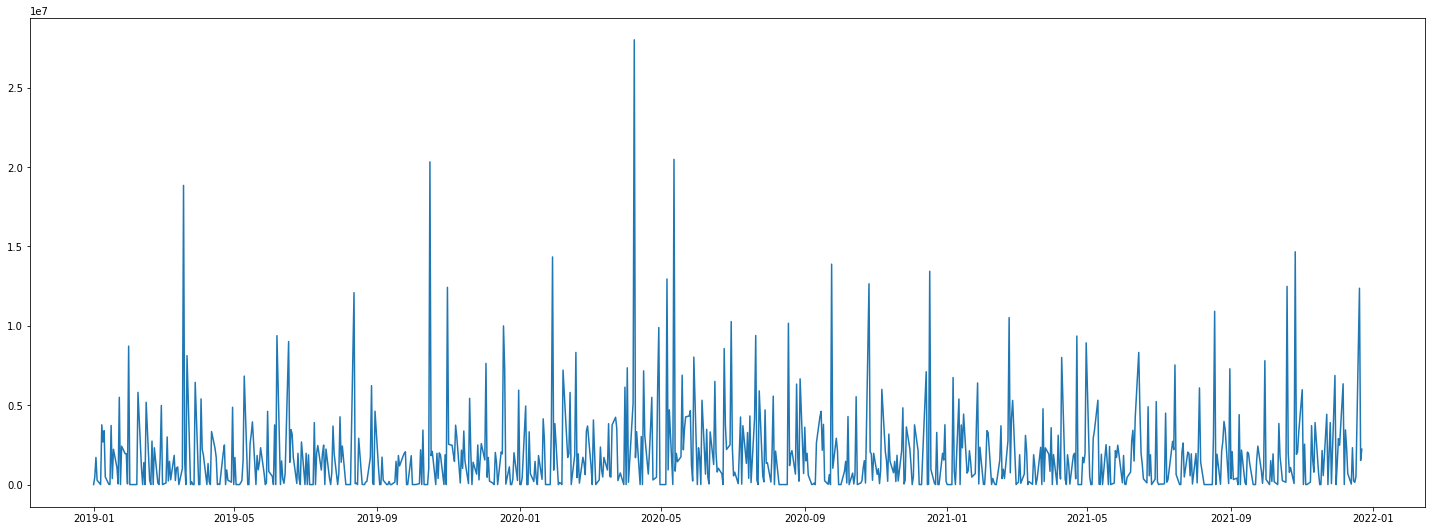

In [41]:
plt.figure(figsize = (25, 9))
plt.plot(df_1140.index,df_1140.y)
plt.show()

In [42]:
m=Prophet(growth='logistic',weekly_seasonality= 20,yearly_seasonality=5,seasonality_prior_scale=20, changepoint_prior_scale=0.5)
m.add_seasonality(name='monthly', period=30.5, fourier_order=2)
m.add_country_holidays(country_name='KR')
m.fit(df_1140)

future = m.make_future_dataframe(periods=9)
future = future[future['ds'].dt.dayofweek < 5]
future['cap'] = 30000000
future['floor'] = 0

forecast=m.predict(future)
forecast.tail(10)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,cap,floor,yhat_lower,yhat_upper,trend_lower,trend_upper,Alternative holiday of Children's Day,Alternative holiday of Children's Day_lower,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
774,2021-12-20,"276,581",30000000,0,"-1,846,977","5,193,481","276,581","276,581",0,0,...,"1,332,536","1,332,536","1,332,536","-155,213","-155,213","-155,213",0,0,0,"1,584,743"
775,2021-12-21,"277,190",30000000,0,"-778,653","5,841,644","277,190","277,190",0,0,...,"2,372,609","2,372,609","2,372,609","-145,770","-145,770","-145,770",0,0,0,"2,613,588"
776,2021-12-22,"277,800",30000000,0,"-1,012,370","5,661,377","277,800","277,800",0,0,...,"2,056,300","2,056,300","2,056,300","-135,682","-135,682","-135,682",0,0,0,"2,290,590"
777,2021-12-23,"278,412",30000000,0,"-1,441,940","5,593,724","278,412","278,412",0,0,...,"1,920,247","1,920,247","1,920,247","-125,015","-125,015","-125,015",0,0,0,"2,157,748"
778,2021-12-24,"279,025",30000000,0,"-1,617,541","5,339,096","279,025","279,025",0,0,...,"1,864,062","1,864,062","1,864,062","-113,837","-113,837","-113,837",0,0,0,"2,117,428"
779,2021-12-27,"280,872",30000000,0,"-1,923,160","5,398,225","280,872","280,872",0,0,...,"1,332,536","1,332,536","1,332,536","-77,960","-77,960","-77,960",0,0,0,"1,690,595"
780,2021-12-28,"281,491",30000000,0,"-898,495","6,329,246","281,491","281,491",0,0,...,"2,372,609","2,372,609","2,372,609","-65,472","-65,472","-65,472",0,0,0,"2,765,683"
781,2021-12-29,"282,110",30000000,0,"-1,147,342","5,956,513","282,110","282,110",0,0,...,"2,056,300","2,056,300","2,056,300","-52,848","-52,848","-52,848",0,0,0,"2,472,232"
782,2021-12-30,"282,731",30000000,0,"-1,111,631","5,937,399","282,731","282,731",0,0,...,"1,920,247","1,920,247","1,920,247","-40,167","-40,167","-40,167",0,0,0,"2,340,699"
783,2021-12-31,"283,354",30000000,0,"-1,200,092","5,858,609","283,354","283,354",0,0,...,"1,864,062","1,864,062","1,864,062","-27,508","-27,508","-27,508",0,0,0,"2,267,053"


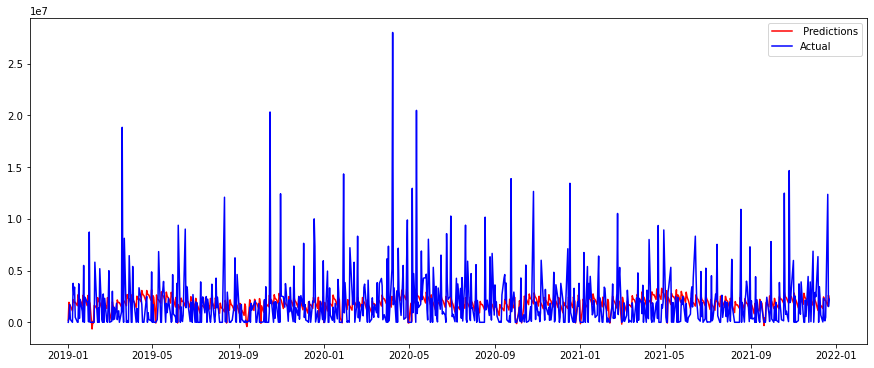

In [43]:
preds= forecast['yhat'][:-7]
plt.figure(figsize=(15,6))
plt.plot(df_1140.index,preds,color='red',label=' Predictions')
plt.plot(df_1140.index,df_1140.y,color='blue',label='Actual')
plt.legend()
plt.show()

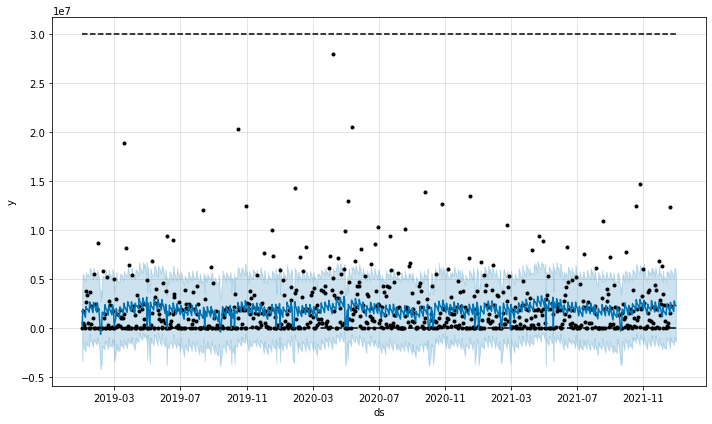

In [44]:
fig = m.plot(m.predict(future))

In [45]:
r2 = round(r2_score(df_1140["y"], preds), 3)
mse = round(mean_squared_error(df_1140["y"], preds), 3)
mae = round(mean_absolute_error(df_1140["y"], preds), 3)
print("R2: ", r2)
print("MSE: ", mse)
print("MAE: ", mae)

R2:  0.047
MSE:  7709584093064.349
MAE:  1775247.317


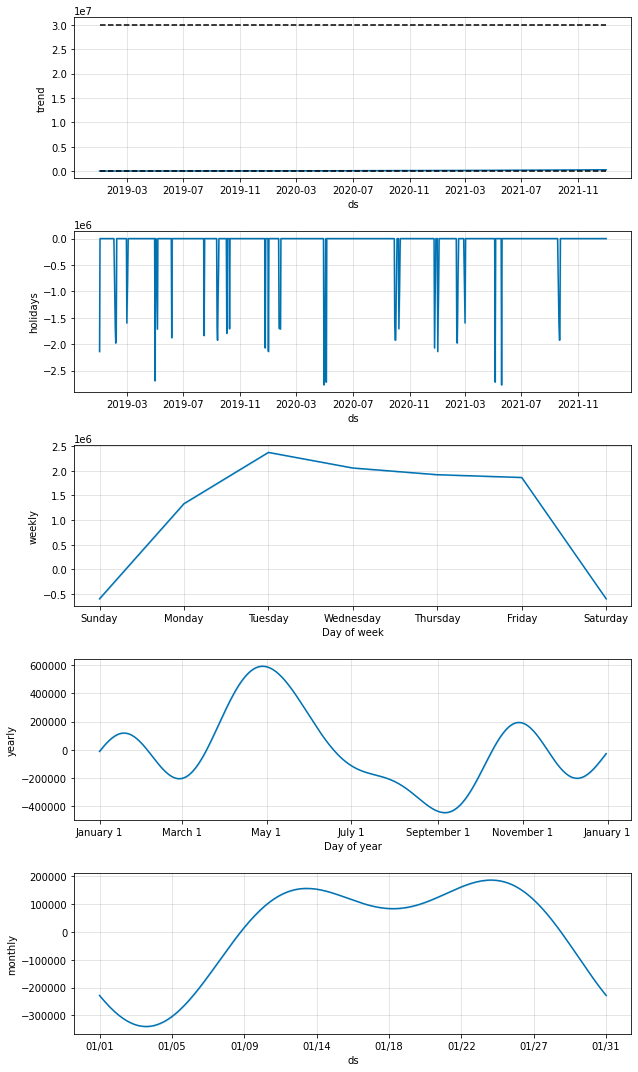

In [46]:
fig = m.plot_components(forecast)

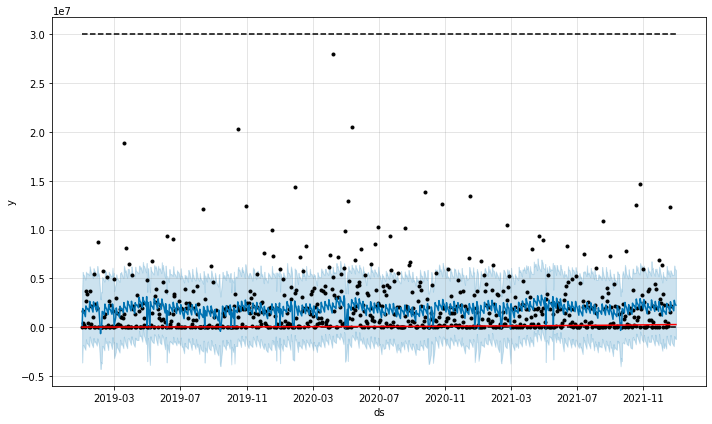

In [47]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [48]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(9))

            ds      yhat  yhat_lower  yhat_upper
775 2021-12-21 2,613,588    -778,653   5,841,644
776 2021-12-22 2,290,590  -1,012,370   5,661,377
777 2021-12-23 2,157,748  -1,441,940   5,593,724
778 2021-12-24 2,117,428  -1,617,541   5,339,096
779 2021-12-27 1,690,595  -1,923,160   5,398,225
780 2021-12-28 2,765,683    -898,495   6,329,246
781 2021-12-29 2,472,232  -1,147,342   5,956,513
782 2021-12-30 2,340,699  -1,111,631   5,937,399
783 2021-12-31 2,267,053  -1,200,092   5,858,609


In [49]:
final_1140 = forecast[['ds', 'yhat']]
final_1140['yhat_1140'] = final_1140['yhat']
final_1140 = final_1140[['ds', 'yhat_1140']]
final_1140.head()

,ds,yhat_1140
0,2019-01-01,"177,235"
1,2019-01-02,"1,927,525"
2,2019-01-03,"1,723,832"
3,2019-01-04,"1,616,441"
4,2019-01-07,"1,091,092"


In [50]:
#Poseung
df_1150 = df[['date','1150']]
df_1150['ds'] = pd.to_datetime(df_1150['date'])
df_1150['y'] = df_1150['1150']
df_1150 = df_1150.loc[:,['ds', 'y']]
df_1150.head()

,ds,y
0,2019-01-01,0
1,2019-01-02,0
2,2019-01-03,0
3,2019-01-04,0
4,2019-01-05,0


In [51]:
df_1150['ds'] = pd.to_datetime(df_1150['ds'])
df_1150 = df_1150[df_1150['ds'].dt.dayofweek < 5]
df_1150['date_index'] = df_1150['ds']
df_1150 = df_1150.set_index('date_index')
df_1150['cap'] = 30000000
df_1150['floor'] = 0
df_1150.head(10)

,ds,y,cap,floor
date_index,,,,
2019-01-01,2019-01-01,0,30000000,0
2019-01-02,2019-01-02,0,30000000,0
2019-01-03,2019-01-03,0,30000000,0
2019-01-04,2019-01-04,0,30000000,0
2019-01-07,2019-01-07,0,30000000,0
2019-01-08,2019-01-08,0,30000000,0
2019-01-09,2019-01-09,0,30000000,0
2019-01-10,2019-01-10,0,30000000,0
2019-01-11,2019-01-11,0,30000000,0


In [52]:
from datetime import datetime
df_1150 = df_1150[datetime(2019, 1, 1):datetime(2021, 12, 22)]

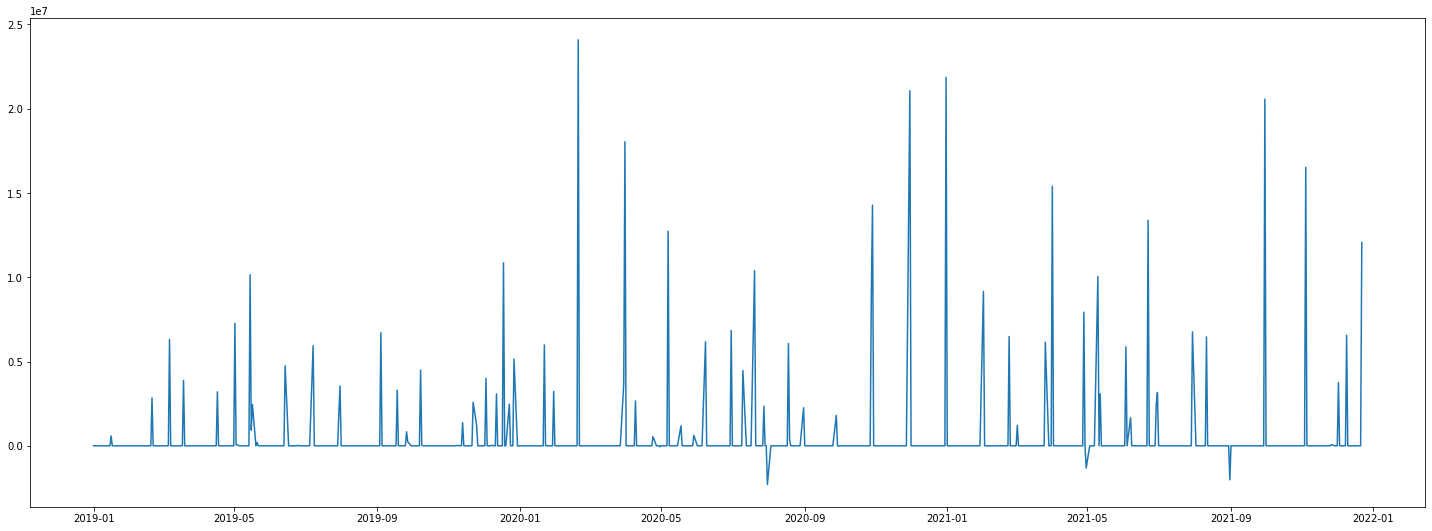

In [53]:
plt.figure(figsize = (25, 9))
plt.plot(df_1150.index,df_1150.y)
plt.show()

In [54]:
m=Prophet(growth='logistic',weekly_seasonality= 20,yearly_seasonality=5,seasonality_prior_scale=20, changepoint_prior_scale=0.5)
m.add_seasonality(name='monthly', period=30.5, fourier_order=2)
m.add_country_holidays(country_name='KR')
m.fit(df_1150)

future = m.make_future_dataframe(periods=9)
future = future[future['ds'].dt.dayofweek < 5]
future['cap'] = 25000000
future['floor'] = 0

forecast=m.predict(future)
forecast.tail(10)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,cap,floor,yhat_lower,yhat_upper,trend_lower,trend_upper,Alternative holiday of Children's Day,Alternative holiday of Children's Day_lower,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
774,2021-12-20,"349,171",25000000,0,"-1,871,753","4,316,750","349,171","349,171",0,0,...,"427,358","427,358","427,358","451,252","451,252","451,252",0,0,0,"1,127,805"
775,2021-12-21,"350,522",25000000,0,"-1,976,067","4,010,244","350,522","350,522",0,0,...,"366,020","366,020","366,020","446,270","446,270","446,270",0,0,0,"1,043,509"
776,2021-12-22,"351,878",25000000,0,"-2,024,156","4,001,715","351,878","351,878",0,0,...,"529,784","529,784","529,784","439,567","439,567","439,567",0,0,0,"1,183,158"
777,2021-12-23,"353,239",25000000,0,"-1,512,204","4,827,565","353,239","353,239",0,0,...,"1,015,390","1,015,390","1,015,390","431,183","431,183","431,183",0,0,0,"1,656,170"
778,2021-12-24,"354,605",25000000,0,"-2,113,304","3,893,897","354,605","354,605",0,0,...,"139,970","139,970","139,970","421,172","421,172","421,172",0,0,0,"790,574"
779,2021-12-27,"358,736",25000000,0,"-1,962,929","4,500,650","358,736","358,736",0,0,...,"427,358","427,358","427,358","382,035","382,035","382,035",0,0,0,"1,282,296"
780,2021-12-28,"360,123",25000000,0,"-1,570,308","4,294,599","360,123","360,123",0,0,...,"366,020","366,020","366,020","366,219","366,219","366,219",0,0,0,"1,331,565"
781,2021-12-29,"361,516",25000000,0,"-1,325,945","4,825,837","361,516","361,516",0,0,...,"529,784","529,784","529,784","349,170","349,170","349,170",0,0,0,"1,606,221"
782,2021-12-30,"362,914",25000000,0,"-1,038,239","5,028,205","362,914","362,914",0,0,...,"1,015,390","1,015,390","1,015,390","330,991","330,991","330,991",0,0,0,"2,186,153"
783,2021-12-31,"364,317",25000000,0,"-1,545,036","4,679,100","364,317","364,317",0,0,...,"139,970","139,970","139,970","311,790","311,790","311,790",0,0,0,"1,372,293"


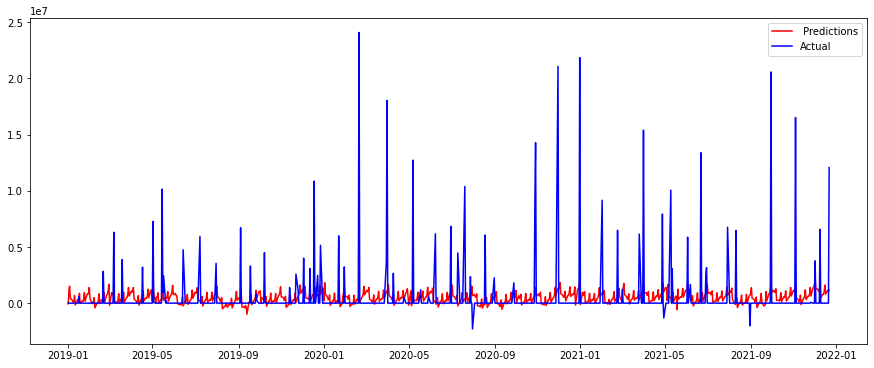

In [55]:
preds= forecast['yhat'][:-7]
plt.figure(figsize=(15,6))
plt.plot(df_1150.index,preds,color='red',label=' Predictions')
plt.plot(df_1150.index,df_1150.y,color='blue',label='Actual')
plt.legend()
plt.show()

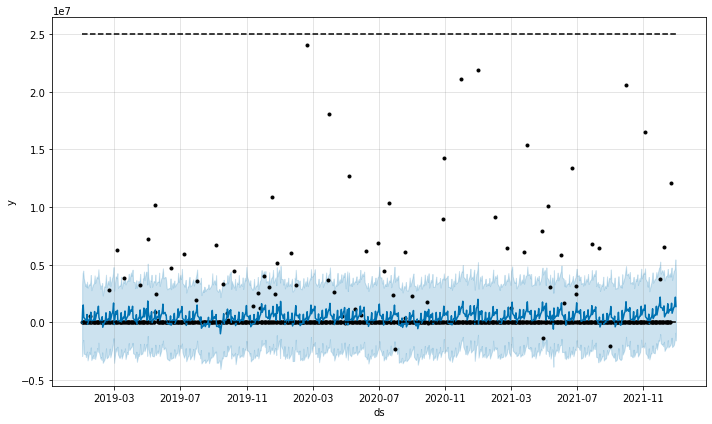

In [56]:
fig = m.plot(m.predict(future))

In [57]:
r2 = round(r2_score(df_1150["y"], preds), 3)
mse = round(mean_squared_error(df_1150["y"], preds), 3)
mae = round(mean_absolute_error(df_1150["y"], preds), 3)
print("R2: ", r2)
print("MSE: ", mse)
print("MAE: ", mae)

R2:  0.039
MSE:  5868034657054.134
MAE:  1023303.614


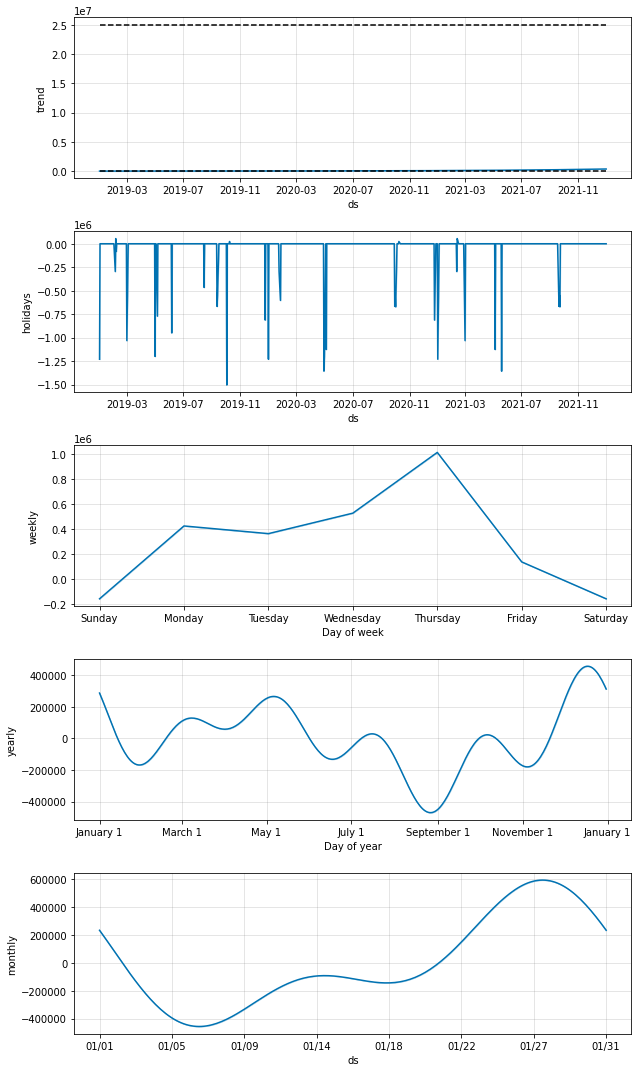

In [58]:
fig = m.plot_components(forecast)

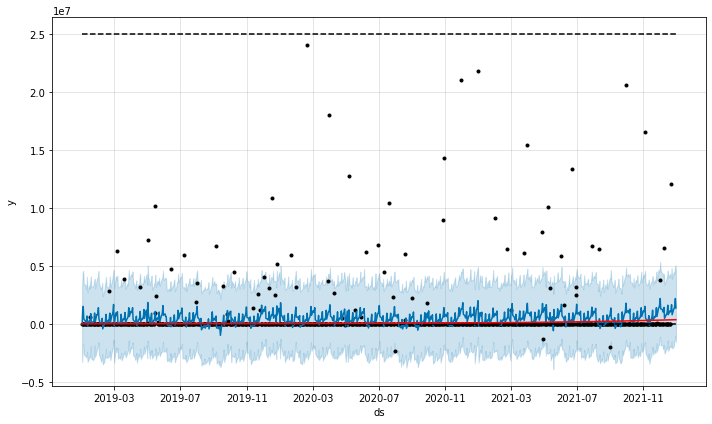

In [59]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [60]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(9))

            ds      yhat  yhat_lower  yhat_upper
775 2021-12-21 1,043,509  -1,976,067   4,010,244
776 2021-12-22 1,183,158  -2,024,156   4,001,715
777 2021-12-23 1,656,170  -1,512,204   4,827,565
778 2021-12-24   790,574  -2,113,304   3,893,897
779 2021-12-27 1,282,296  -1,962,929   4,500,650
780 2021-12-28 1,331,565  -1,570,308   4,294,599
781 2021-12-29 1,606,221  -1,325,945   4,825,837
782 2021-12-30 2,186,153  -1,038,239   5,028,205
783 2021-12-31 1,372,293  -1,545,036   4,679,100


In [61]:
final_1150 = forecast[['ds', 'yhat']]
final_1150['yhat_1150'] = final_1150['yhat']
final_1150 = final_1150[['ds', 'yhat_1150']]
final_1150.head()

,ds,yhat_1150
0,2019-01-01,"-59,217"
1,2019-01-02,"1,195,369"
2,2019-01-03,"1,507,598"
3,2019-01-04,"440,992"
4,2019-01-07,"232,501"


In [62]:
#GUMI
df_1160 = df[['date','1160']]
df_1160['ds'] = pd.to_datetime(df_1160['date'])
df_1160['y'] = df_1160['1160']
df_1160 = df_1160.loc[:,['ds', 'y']]
df_1160.head()

,ds,y
0,2019-01-01,0
1,2019-01-02,48360
2,2019-01-03,807270
3,2019-01-04,901000
4,2019-01-05,0


In [63]:
df_1160['ds'] = pd.to_datetime(df_1160['ds'])
df_1160 = df_1160[df_1160['ds'].dt.dayofweek < 5]
df_1160['date_index'] = df_1160['ds']
df_1160 = df_1160.set_index('date_index')
df_1160['cap'] = 30000000
df_1160['floor'] = 0
df_1160.head(10)

,ds,y,cap,floor
date_index,,,,
2019-01-01,2019-01-01,0,30000000,0
2019-01-02,2019-01-02,48360,30000000,0
2019-01-03,2019-01-03,807270,30000000,0
2019-01-04,2019-01-04,901000,30000000,0
2019-01-07,2019-01-07,829200,30000000,0
2019-01-08,2019-01-08,1238550,30000000,0
2019-01-09,2019-01-09,2607400,30000000,0
2019-01-10,2019-01-10,306300,30000000,0
2019-01-11,2019-01-11,971800,30000000,0


In [64]:
from datetime import datetime
df_1160 = df_1160[datetime(2019, 1, 1):datetime(2021, 12, 22)]

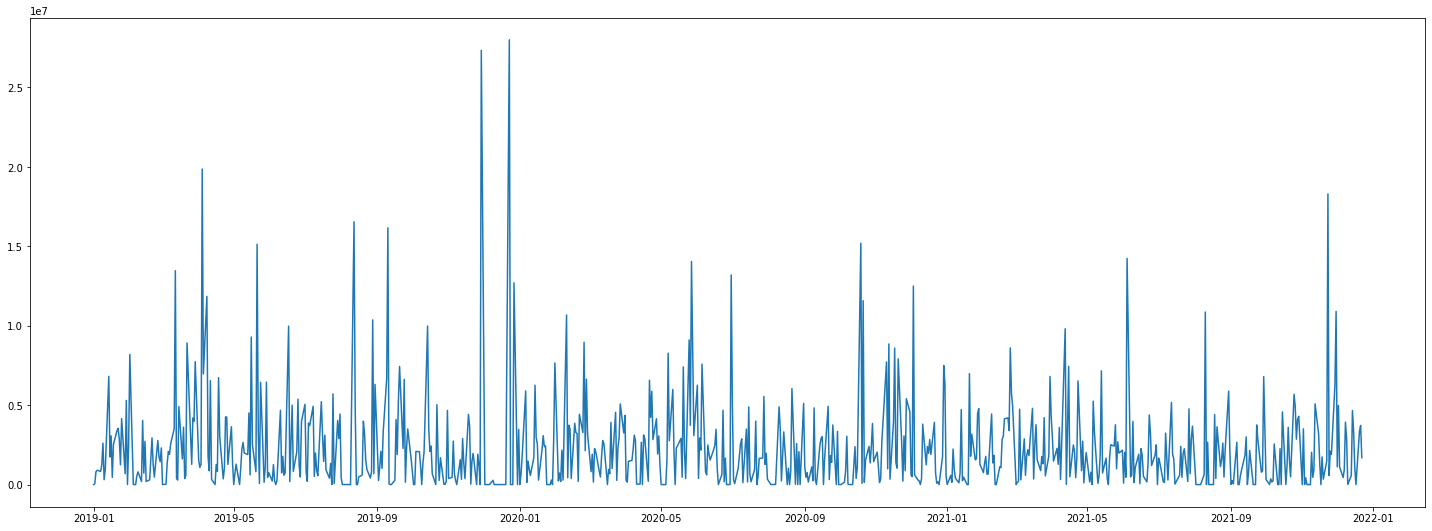

In [65]:
plt.figure(figsize = (25, 9))
plt.plot(df_1160.index,df_1160.y)
plt.show()

In [66]:
m=Prophet(growth='logistic',weekly_seasonality= 20,yearly_seasonality=5,seasonality_prior_scale=20, changepoint_prior_scale=0.5)
m.add_seasonality(name='monthly', period=30.5, fourier_order=2)
m.add_country_holidays(country_name='KR')
m.fit(df_1160)

future = m.make_future_dataframe(periods=9)
future = future[future['ds'].dt.dayofweek < 5]
future['cap'] = 30000000
future['floor'] = 0

forecast=m.predict(future)
forecast.tail(10)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,cap,floor,yhat_lower,yhat_upper,trend_lower,trend_upper,Alternative holiday of Children's Day,Alternative holiday of Children's Day_lower,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
774,2021-12-20,"111,137",30000000,0,"-1,307,661","5,986,971","111,137","111,137",0,0,...,"2,535,393","2,535,393","2,535,393","40,467","40,467","40,467",0,0,0,"2,555,829"
775,2021-12-21,"111,378",30000000,0,"-870,007","6,100,659","111,378","111,378",0,0,...,"2,514,336","2,514,336","2,514,336","23,999","23,999","23,999",0,0,0,"2,636,120"
776,2021-12-22,"111,619",30000000,0,"-1,068,061","6,220,059","111,619","111,619",0,0,...,"2,064,063","2,064,063","2,064,063","7,822","7,822","7,822",0,0,0,"2,337,234"
777,2021-12-23,"111,861",30000000,0,"-1,190,772","6,326,763","111,861","111,861",0,0,...,"2,250,796","2,250,796","2,250,796","-8,000","-8,000","-8,000",0,0,0,"2,706,631"
778,2021-12-24,"112,104",30000000,0,"-544,856","6,667,824","112,104","112,104",0,0,...,"2,323,720","2,323,720","2,323,720","-23,402","-23,402","-23,402",0,0,0,"2,967,160"
779,2021-12-27,"112,834",30000000,0,"-337,080","7,128,032","112,834","112,834",0,0,...,"2,535,393","2,535,393","2,535,393","-66,525","-66,525","-66,525",0,0,0,"3,485,122"
780,2021-12-28,"113,079",30000000,0,"-257,025","7,091,021","113,079","113,079",0,0,...,"2,514,336","2,514,336","2,514,336","-79,701","-79,701","-79,701",0,0,0,"3,410,084"
781,2021-12-29,"113,324",30000000,0,"-880,745","6,175,405","113,324","113,324",0,0,...,"2,064,063","2,064,063","2,064,063","-92,204","-92,204","-92,204",0,0,0,"2,817,628"
782,2021-12-30,"113,569",30000000,0,"-1,172,218","6,520,081","113,569","113,569",0,0,...,"2,250,796","2,250,796","2,250,796","-103,995","-103,995","-103,995",0,0,0,"2,786,263"
783,2021-12-31,"113,816",30000000,0,"-1,260,044","6,156,160","113,816","113,816",0,0,...,"2,323,720","2,323,720","2,323,720","-115,043","-115,043","-115,043",0,0,0,"2,588,337"


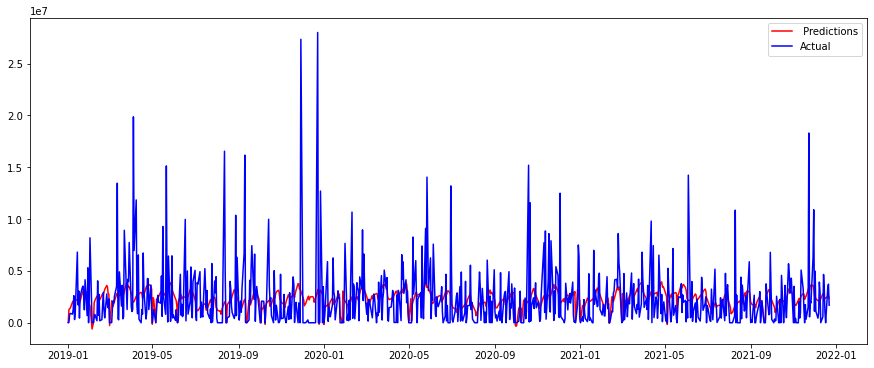

In [67]:
preds= forecast['yhat'][:-7]
plt.figure(figsize=(15,6))
plt.plot(df_1160.index,preds,color='red',label=' Predictions')
plt.plot(df_1160.index,df_1160.y,color='blue',label='Actual')
plt.legend()
plt.show()

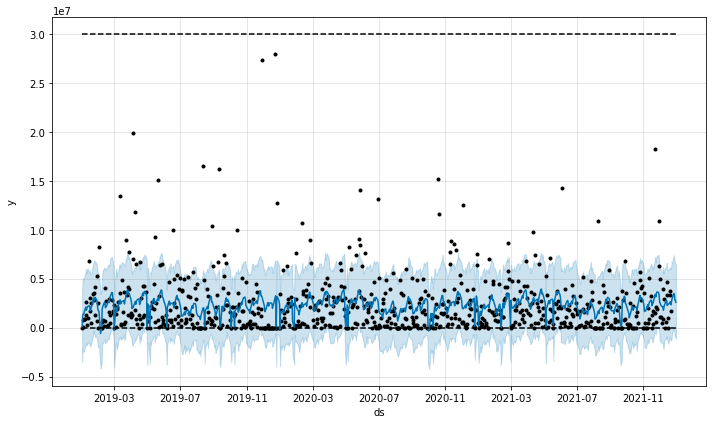

In [68]:
fig = m.plot(m.predict(future))

In [69]:
r2 = round(r2_score(df_1160["y"], preds), 3)
mse = round(mean_squared_error(df_1160["y"], preds), 3)
mae = round(mean_absolute_error(df_1160["y"], preds), 3)
print("R2: ", r2)
print("MSE: ", mse)
print("MAE: ", mae)

R2:  0.067
MSE:  8474350585671.633
MAE:  1870774.523


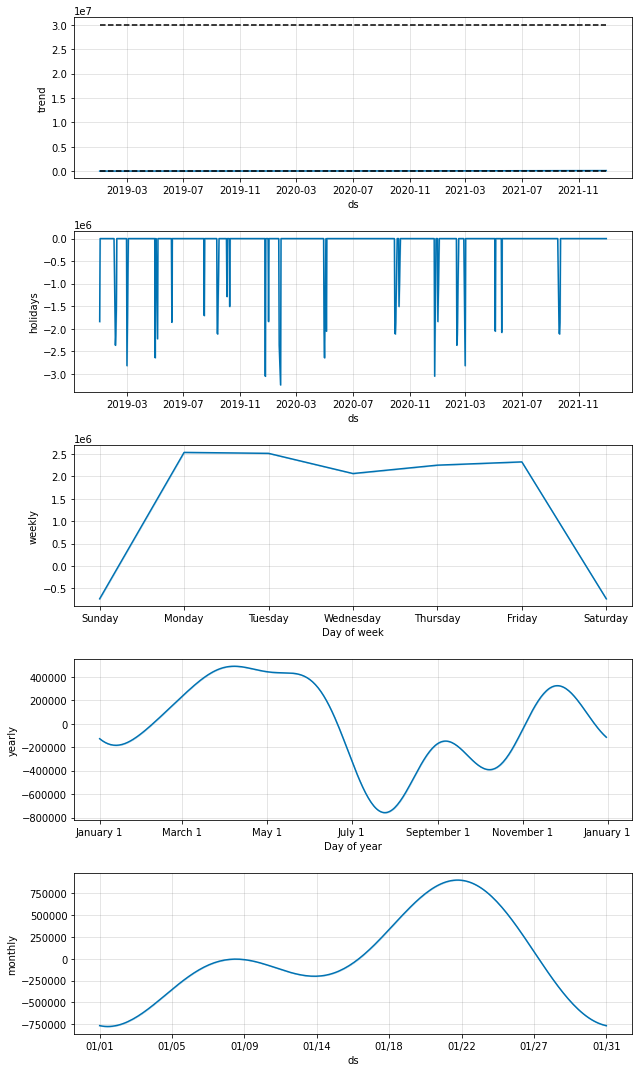

In [70]:
fig = m.plot_components(forecast)

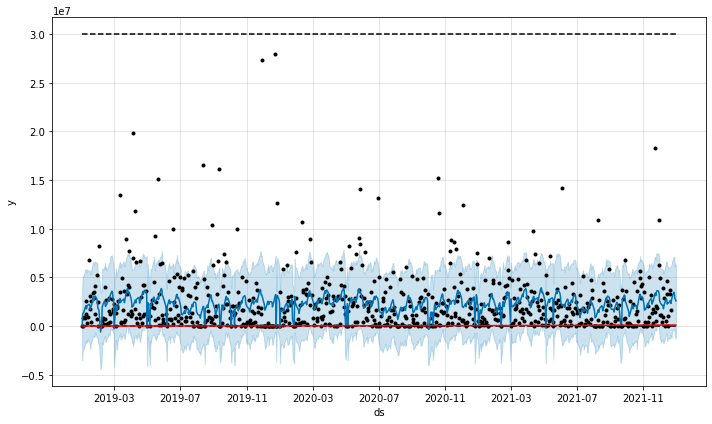

In [71]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [72]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(9))

            ds      yhat  yhat_lower  yhat_upper
775 2021-12-21 2,636,120    -870,007   6,100,659
776 2021-12-22 2,337,234  -1,068,061   6,220,059
777 2021-12-23 2,706,631  -1,190,772   6,326,763
778 2021-12-24 2,967,160    -544,856   6,667,824
779 2021-12-27 3,485,122    -337,080   7,128,032
780 2021-12-28 3,410,084    -257,025   7,091,021
781 2021-12-29 2,817,628    -880,745   6,175,405
782 2021-12-30 2,786,263  -1,172,218   6,520,081
783 2021-12-31 2,588,337  -1,260,044   6,156,160


In [73]:
final_1160 = forecast[['ds', 'yhat']]
final_1160['yhat_1160'] = final_1160['yhat']
final_1160 = final_1160[['ds', 'yhat_1160']]
final_1160.head()

,ds,yhat_1160
0,2019-01-01,"43,425"
1,2019-01-02,"1,259,235"
2,2019-01-03,"1,354,762"
3,2019-01-04,"1,420,545"
4,2019-01-07,"1,970,403"


In [74]:
#Pusan
df_1170 = df[['date','1170']]
df_1170['ds'] = pd.to_datetime(df_1170['date'])
df_1170['y'] = df_1170['1170']
df_1170 = df_1170.loc[:,['ds', 'y']]
df_1170.head()

,ds,y
0,2019-01-01,0
1,2019-01-02,376880
2,2019-01-03,1125000
3,2019-01-04,0
4,2019-01-05,0


In [75]:
df_1170['ds'] = pd.to_datetime(df_1170['ds'])
df_1170 = df_1170[df_1170['ds'].dt.dayofweek < 5]
df_1170['date_index'] = df_1170['ds']
df_1170 = df_1170.set_index('date_index')
df_1170['cap'] = 30000000
df_1170['floor'] = 0
df_1170.head(10)

,ds,y,cap,floor
date_index,,,,
2019-01-01,2019-01-01,0,30000000,0
2019-01-02,2019-01-02,376880,30000000,0
2019-01-03,2019-01-03,1125000,30000000,0
2019-01-04,2019-01-04,0,30000000,0
2019-01-07,2019-01-07,1756570,30000000,0
2019-01-08,2019-01-08,1919400,30000000,0
2019-01-09,2019-01-09,712250,30000000,0
2019-01-10,2019-01-10,938000,30000000,0
2019-01-11,2019-01-11,0,30000000,0


In [76]:
from datetime import datetime
df_1170 = df_1170[datetime(2019, 1, 1):datetime(2021, 12, 22)]

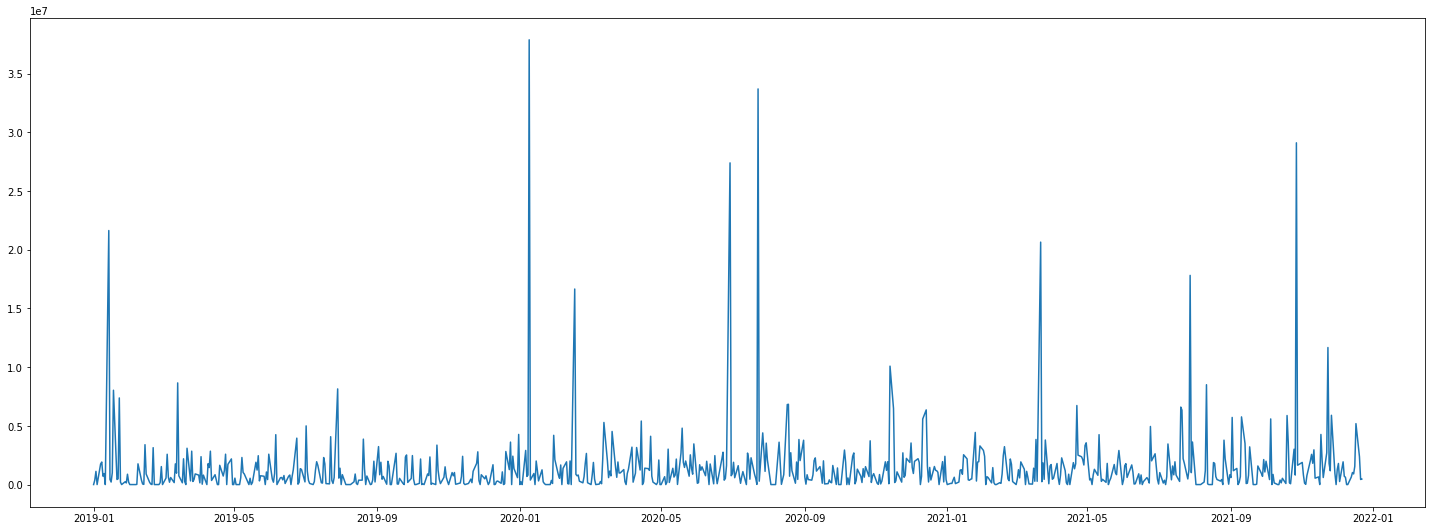

In [77]:
plt.figure(figsize = (25, 9))
plt.plot(df_1170.index,df_1170.y)
plt.show()

In [78]:
m=Prophet(growth='logistic',weekly_seasonality= 20,yearly_seasonality=5,seasonality_prior_scale=20, changepoint_prior_scale=0.5)
m.add_seasonality(name='monthly', period=30.5, fourier_order=2)
m.add_country_holidays(country_name='KR')
m.fit(df_1170)

future = m.make_future_dataframe(periods=9)
future = future[future['ds'].dt.dayofweek < 5]
future['cap'] = 30000000
future['floor'] = 0

forecast=m.predict(future)
forecast.tail(10)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,cap,floor,yhat_lower,yhat_upper,trend_lower,trend_upper,Alternative holiday of Children's Day,Alternative holiday of Children's Day_lower,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
774,2021-12-20,"4,284,599",30000000,0,"-1,290,761","6,150,445","4,284,599","4,284,599",0,0,...,"-2,195,270","-2,195,270","-2,195,270","246,649","246,649","246,649",0,0,0,"2,454,615"
775,2021-12-21,"4,285,312",30000000,0,"-1,529,150","5,949,695","4,285,312","4,285,312",0,0,...,"-2,565,554","-2,565,554","-2,565,554","277,200","277,200","277,200",0,0,0,"2,195,427"
776,2021-12-22,"4,286,026",30000000,0,"-1,327,925","5,908,447","4,286,026","4,286,026",0,0,...,"-2,560,416","-2,560,416","-2,560,416","307,498","307,498","307,498",0,0,0,"2,329,397"
777,2021-12-23,"4,286,739",30000000,0,"-959,296","6,452,188","4,286,739","4,286,739",0,0,...,"-2,334,328","-2,334,328","-2,334,328","337,379","337,379","337,379",0,0,0,"2,689,402"
778,2021-12-24,"4,287,453",30000000,0,"-1,182,667","6,289,797","4,287,453","4,287,453",0,0,...,"-2,624,707","-2,624,707","-2,624,707","366,682","366,682","366,682",0,0,0,"2,522,122"
779,2021-12-27,"4,289,594",30000000,0,"-504,960","6,846,519","4,289,594","4,289,594",0,0,...,"-2,195,270","-2,195,270","-2,195,270","449,547","449,547","449,547",0,0,0,"3,103,215"
780,2021-12-28,"4,290,308",30000000,0,"-1,137,855","6,628,407","4,290,308","4,290,308",0,0,...,"-2,565,554","-2,565,554","-2,565,554","474,981","474,981","474,981",0,0,0,"2,679,996"
781,2021-12-29,"4,291,022",30000000,0,"-1,242,583","5,958,266","4,291,022","4,291,022",0,0,...,"-2,560,416","-2,560,416","-2,560,416","499,082","499,082","499,082",0,0,0,"2,581,136"
782,2021-12-30,"4,291,736",30000000,0,"-1,198,818","6,559,402","4,291,736","4,291,736",0,0,...,"-2,334,328","-2,334,328","-2,334,328","521,716","521,716","521,716",0,0,0,"2,663,188"
783,2021-12-31,"4,292,451",30000000,0,"-1,649,340","5,965,385","4,292,451","4,292,451",0,0,...,"-2,624,707","-2,624,707","-2,624,707","542,757","542,757","542,757",0,0,0,"2,205,371"


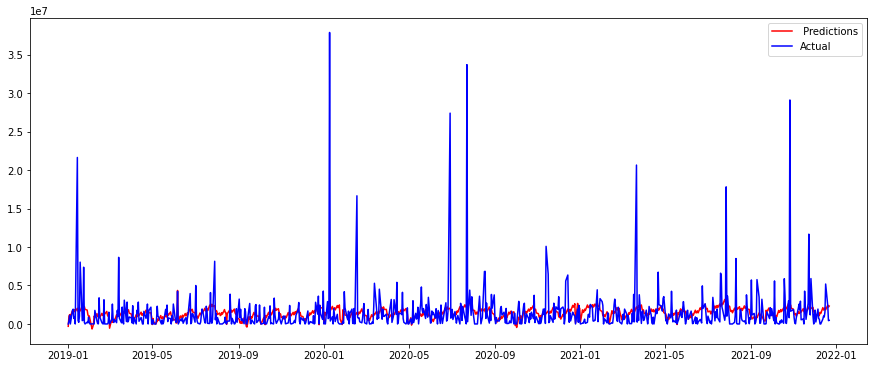

In [79]:
preds= forecast['yhat'][:-7]
plt.figure(figsize=(15,6))
plt.plot(df_1170.index,preds,color='red',label=' Predictions')
plt.plot(df_1170.index,df_1170.y,color='blue',label='Actual')
plt.legend()
plt.show()

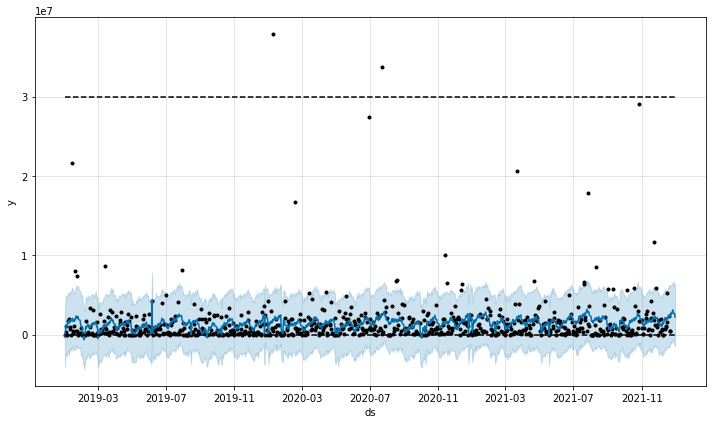

In [80]:
fig = m.plot(m.predict(future))

In [81]:
r2 = round(r2_score(df_1170["y"], preds), 3)
mse = round(mean_squared_error(df_1170["y"], preds), 3)
mae = round(mean_absolute_error(df_1170["y"], preds), 3)
print("R2: ", r2)
print("MSE: ", mse)
print("MAE: ", mae)

R2:  0.045
MSE:  8371138761481.977
MAE:  1327922.816


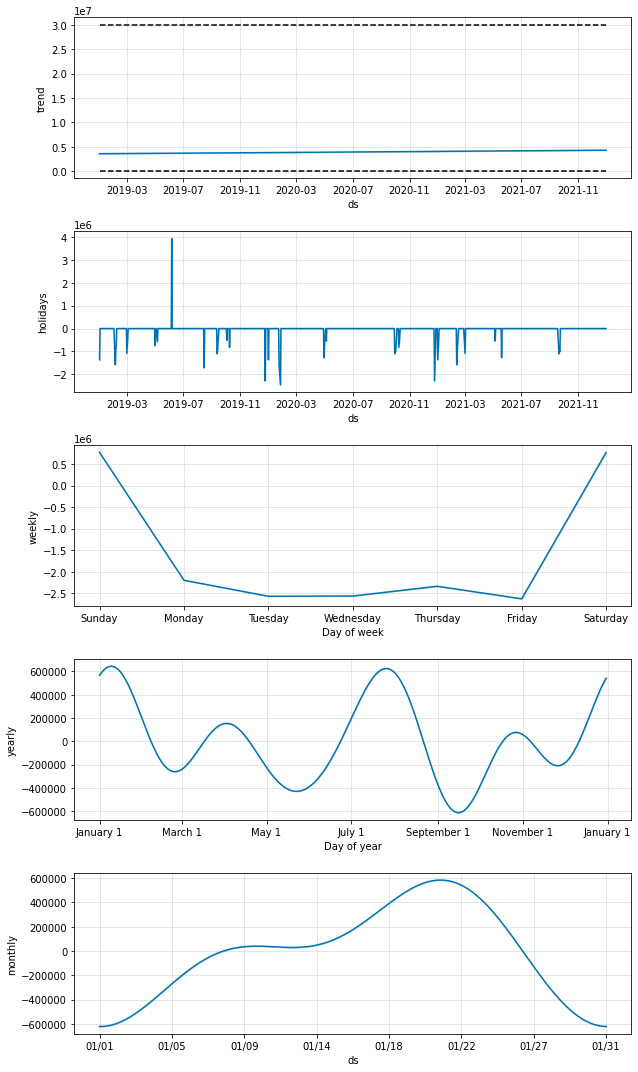

In [82]:
fig = m.plot_components(forecast)

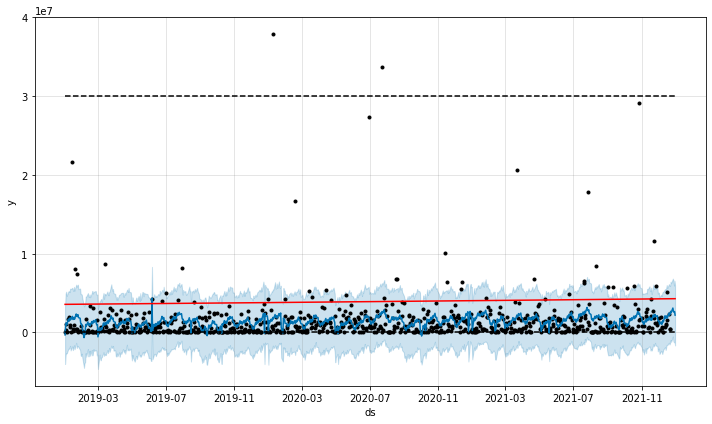

In [83]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [84]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(9))

            ds      yhat  yhat_lower  yhat_upper
775 2021-12-21 2,195,427  -1,529,150   5,949,695
776 2021-12-22 2,329,397  -1,327,925   5,908,447
777 2021-12-23 2,689,402    -959,296   6,452,188
778 2021-12-24 2,522,122  -1,182,667   6,289,797
779 2021-12-27 3,103,215    -504,960   6,846,519
780 2021-12-28 2,679,996  -1,137,855   6,628,407
781 2021-12-29 2,581,136  -1,242,583   5,958,266
782 2021-12-30 2,663,188  -1,198,818   6,559,402
783 2021-12-31 2,205,371  -1,649,340   5,965,385


In [85]:
final_1170 = forecast[['ds', 'yhat']]
final_1170['yhat_1170'] = final_1170['yhat']
final_1170 = final_1170[['ds', 'yhat_1170']]
final_1170.head()

,ds,yhat_1170
0,2019-01-01,"-305,650"
1,2019-01-02,"999,673"
2,2019-01-03,"1,211,585"
3,2019-01-04,"959,140"
4,2019-01-07,"1,706,506"


In [86]:
#Noksan
df_1180 = df[['date','1180']]
df_1180['ds'] = pd.to_datetime(df_1180['date'])
df_1180['y'] = df_1180['1180']
df_1180 = df_1180.loc[:,['ds', 'y']]
df_1180.head()

,ds,y
0,2019-01-01,0
1,2019-01-02,494970
2,2019-01-03,0
3,2019-01-04,440400
4,2019-01-05,0


In [87]:
df_1180['ds'] = pd.to_datetime(df_1180['ds'])
df_1180 = df_1180[df_1180['ds'].dt.dayofweek < 5]
df_1180['date_index'] = df_1180['ds']
df_1180 = df_1180.set_index('date_index')
df_1180['cap'] = 30000000
df_1180['floor'] = 0
df_1180.head(10)

,ds,y,cap,floor
date_index,,,,
2019-01-01,2019-01-01,0,30000000,0
2019-01-02,2019-01-02,494970,30000000,0
2019-01-03,2019-01-03,0,30000000,0
2019-01-04,2019-01-04,440400,30000000,0
2019-01-07,2019-01-07,0,30000000,0
2019-01-08,2019-01-08,187000,30000000,0
2019-01-09,2019-01-09,1038360,30000000,0
2019-01-10,2019-01-10,0,30000000,0
2019-01-11,2019-01-11,572780,30000000,0


In [88]:
from datetime import datetime
df_1180 = df_1180[datetime(2019, 1, 1):datetime(2021, 12, 22)]

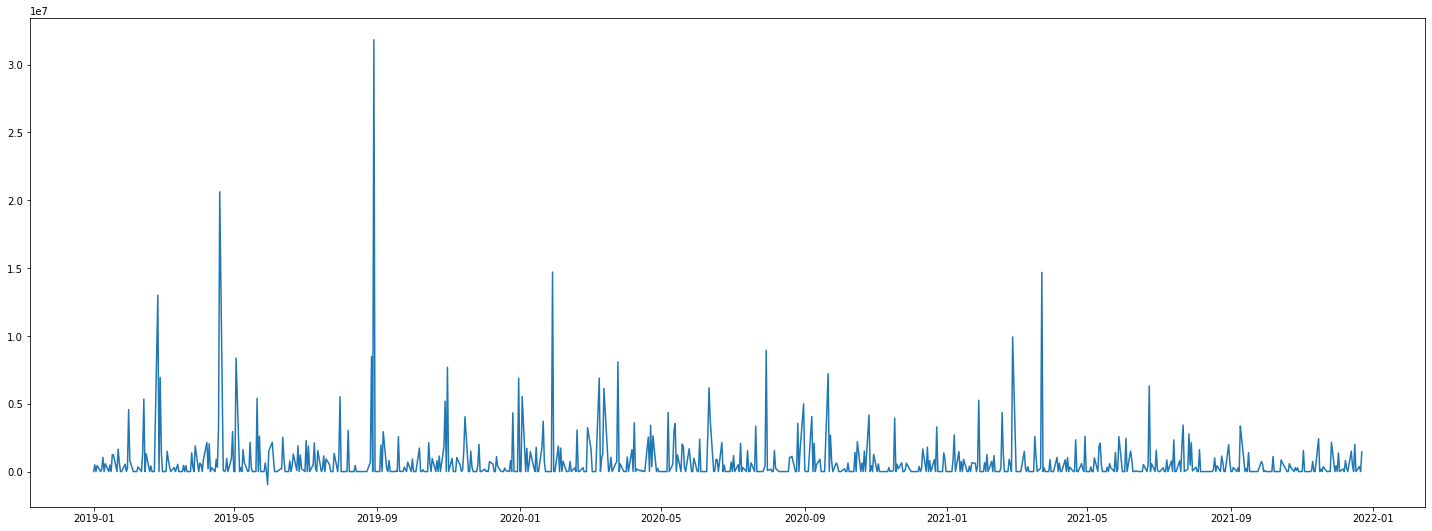

In [89]:
plt.figure(figsize = (25, 9))
plt.plot(df_1180.index,df_1180.y)
plt.show()

In [90]:
m=Prophet(growth='logistic',weekly_seasonality= 20,yearly_seasonality=5,seasonality_prior_scale=20, changepoint_prior_scale=0.5)
m.add_seasonality(name='monthly', period=30.5, fourier_order=2)
m.add_country_holidays(country_name='KR')
m.fit(df_1180)

future = m.make_future_dataframe(periods=9)
future = future[future['ds'].dt.dayofweek < 5]
future['cap'] = 30000000
future['floor'] = 0

forecast=m.predict(future)
forecast.tail(10)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,cap,floor,yhat_lower,yhat_upper,trend_lower,trend_upper,Alternative holiday of Children's Day,Alternative holiday of Children's Day_lower,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
774,2021-12-20,"16,468",30000000,0,"-2,284,074","2,761,555","16,468","16,468",0,0,...,"632,543","632,543","632,543","-253,044","-253,044","-253,044",0,0,0,"287,129"
775,2021-12-21,"16,507",30000000,0,"-2,117,706","2,933,882","16,507","16,507",0,0,...,"756,135","756,135","756,135","-244,598","-244,598","-244,598",0,0,0,"442,049"
776,2021-12-22,"16,547",30000000,0,"-1,847,022","3,428,696","16,547","16,547",0,0,...,"963,359","963,359","963,359","-235,460","-235,460","-235,460",0,0,0,"702,164"
777,2021-12-23,"16,586",30000000,0,"-1,851,317","3,232,307","16,586","16,586",0,0,...,"965,041","965,041","965,041","-225,640","-225,640","-225,640",0,0,0,"777,771"
778,2021-12-24,"16,626",30000000,0,"-2,118,547","3,250,665","16,626","16,626",0,0,...,"795,076","795,076","795,076","-215,151","-215,151","-215,151",0,0,0,"698,266"
779,2021-12-27,"16,745",30000000,0,"-1,771,676","3,430,375","16,745","16,745",0,0,...,"632,543","632,543","632,543","-179,878","-179,878","-179,878",0,0,0,"816,109"
780,2021-12-28,"16,785",30000000,0,"-1,684,806","3,689,872","16,785","16,785",0,0,...,"756,135","756,135","756,135","-166,937","-166,937","-166,937",0,0,0,"1,000,569"
781,2021-12-29,"16,825",30000000,0,"-1,344,683","3,827,359","16,825","16,825",0,0,...,"963,359","963,359","963,359","-153,458","-153,458","-153,458",0,0,0,"1,237,610"
782,2021-12-30,"16,865",30000000,0,"-1,397,459","3,769,621","16,865","16,865",0,0,...,"965,041","965,041","965,041","-139,477","-139,477","-139,477",0,0,0,"1,234,139"
783,2021-12-31,"16,905",30000000,0,"-1,790,434","3,620,889","16,905","16,905",0,0,...,"795,076","795,076","795,076","-125,035","-125,035","-125,035",0,0,0,"1,024,662"


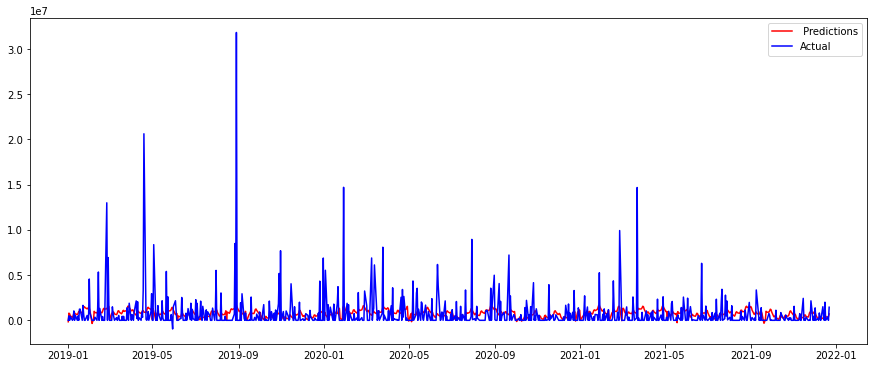

In [91]:
preds= forecast['yhat'][:-7]
plt.figure(figsize=(15,6))
plt.plot(df_1180.index,preds,color='red',label=' Predictions')
plt.plot(df_1180.index,df_1180.y,color='blue',label='Actual')
plt.legend()
plt.show()

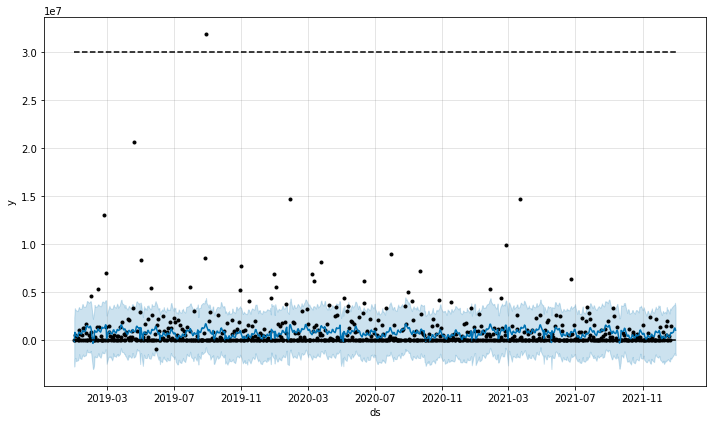

In [92]:
fig = m.plot(m.predict(future))

In [93]:
r2 = round(r2_score(df_1180["y"], preds), 3)
mse = round(mean_squared_error(df_1180["y"], preds), 3)
mae = round(mean_absolute_error(df_1180["y"], preds), 3)
print("R2: ", r2)
print("MSE: ", mse)
print("MAE: ", mae)

R2:  0.033
MSE:  4070949925448.41
MAE:  996757.345


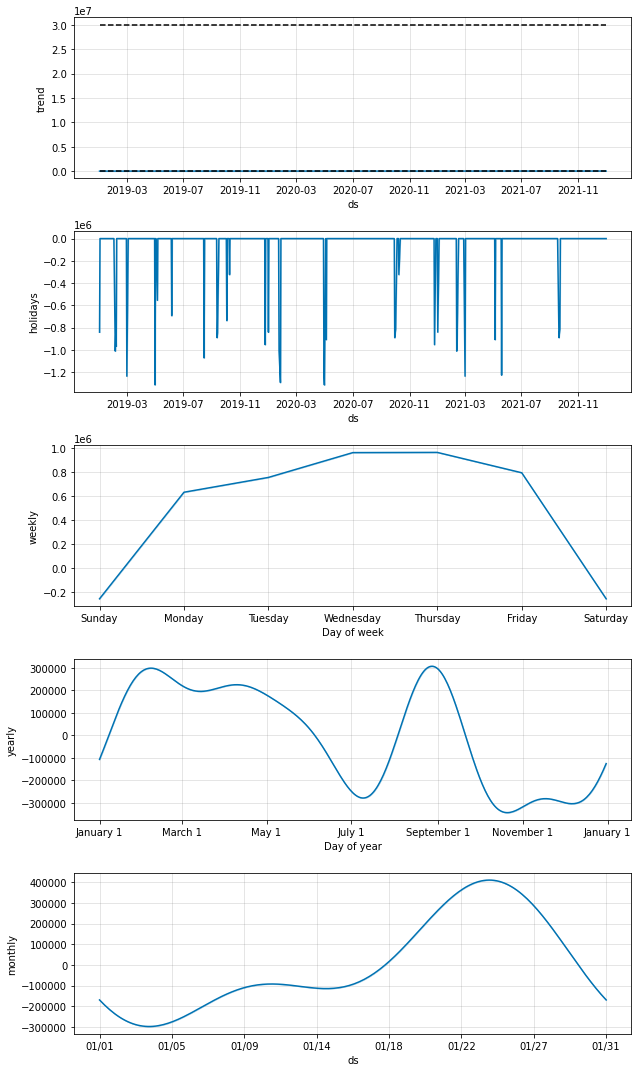

In [94]:
fig = m.plot_components(forecast)

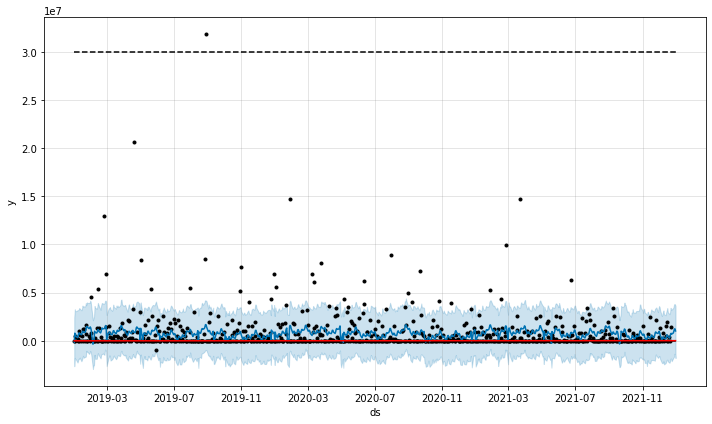

In [95]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [96]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(9))

            ds      yhat  yhat_lower  yhat_upper
775 2021-12-21   442,049  -2,117,706   2,933,882
776 2021-12-22   702,164  -1,847,022   3,428,696
777 2021-12-23   777,771  -1,851,317   3,232,307
778 2021-12-24   698,266  -2,118,547   3,250,665
779 2021-12-27   816,109  -1,771,676   3,430,375
780 2021-12-28 1,000,569  -1,684,806   3,689,872
781 2021-12-29 1,237,610  -1,344,683   3,827,359
782 2021-12-30 1,234,139  -1,397,459   3,769,621
783 2021-12-31 1,024,662  -1,790,434   3,620,889


In [97]:
final_1180 = forecast[['ds', 'yhat']]
final_1180['yhat_1180'] = final_1180['yhat']
final_1180 = final_1180[['ds', 'yhat_1180']]
final_1180.head()

,ds,yhat_1180
0,2019-01-01,"-161,701"
1,2019-01-02,"792,100"
2,2019-01-03,"713,847"
3,2019-01-04,"487,820"
4,2019-01-07,"329,665"


In [98]:
final_1110['date_index'] = final_1110['ds']
final_1110 = final_1110.set_index('date_index')

final_1120['date_index'] = final_1120['ds']
final_1120 = final_1120.set_index('date_index')

final_1140['date_index'] = final_1140['ds']
final_1140 = final_1140.set_index('date_index')

final_1150['date_index'] = final_1150['ds']
final_1150 = final_1150.set_index('date_index')

final_1160['date_index'] = final_1160['ds']
final_1160 = final_1160.set_index('date_index')

final_1170['date_index'] = final_1170['ds']
final_1170 = final_1170.set_index('date_index')

final_1180['date_index'] = final_1180['ds']
final_1180 = final_1180.set_index('date_index')

In [99]:
final_1110.dtypes

ds           datetime64[ns]
yhat_1110           float64
dtype: object

In [100]:
final_total = pd.merge(final_1110, final_1120)
final_total = pd.merge(final_total, final_1140)
final_total = pd.merge(final_total, final_1150)
final_total = pd.merge(final_total, final_1160)
final_total = pd.merge(final_total, final_1170)
final_total = pd.merge(final_total, final_1180)
final_total.tail()

,ds,yhat_1110,yhat_1120,yhat_1140,yhat_1150,yhat_1160,yhat_1170,yhat_1180
779,2021-12-27,"6,618,270","1,382,512","1,690,595","1,282,296","3,485,122","3,103,215","816,109"
780,2021-12-28,"5,919,176","1,881,162","2,765,683","1,331,565","3,410,084","2,679,996","1,000,569"
781,2021-12-29,"6,844,492","2,102,170","2,472,232","1,606,221","2,817,628","2,581,136","1,237,610"
782,2021-12-30,"6,907,127","1,952,633","2,340,699","2,186,153","2,786,263","2,663,188","1,234,139"
783,2021-12-31,"9,257,905","2,475,644","2,267,053","1,372,293","2,588,337","2,205,371","1,024,662"


In [101]:
final_total['final_sum'] = final_total['yhat_1110'] + final_total['yhat_1120'] + final_total['yhat_1140'] + final_total['yhat_1150'] + final_total['yhat_1160'] +final_total['yhat_1170'] + final_total['yhat_1180']

In [102]:
final_total.tail(7)

,ds,yhat_1110,yhat_1120,yhat_1140,yhat_1150,yhat_1160,yhat_1170,yhat_1180,final_sum
777,2021-12-23,"5,043,077","1,356,941","2,157,748","1,656,170","2,706,631","2,689,402","777,771","16,387,739"
778,2021-12-24,"7,951,139","1,979,013","2,117,428","790,574","2,967,160","2,522,122","698,266","19,025,703"
779,2021-12-27,"6,618,270","1,382,512","1,690,595","1,282,296","3,485,122","3,103,215","816,109","18,378,119"
780,2021-12-28,"5,919,176","1,881,162","2,765,683","1,331,565","3,410,084","2,679,996","1,000,569","18,988,235"
781,2021-12-29,"6,844,492","2,102,170","2,472,232","1,606,221","2,817,628","2,581,136","1,237,610","19,661,489"
782,2021-12-30,"6,907,127","1,952,633","2,340,699","2,186,153","2,786,263","2,663,188","1,234,139","20,070,203"
783,2021-12-31,"9,257,905","2,475,644","2,267,053","1,372,293","2,588,337","2,205,371","1,024,662","21,191,265"
